### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df_train = pd.read_csv("./Dataset/train.csv")

In [190]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
nan_counts = df_train.isna().sum()
nan_percentages = (nan_counts / len(df_train)) * 100
nan_percentages = nan_percentages.sort_values(ascending=False)

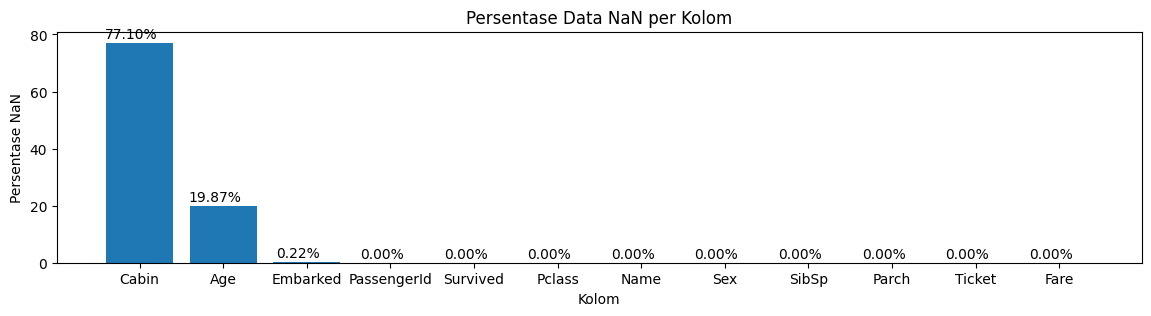

In [193]:
plt.figure(figsize=(14, 3))

# Membuat bar chart
bars = plt.bar(nan_percentages.index, nan_percentages)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Kolom')
plt.ylabel('Persentase NaN')

# Menambahkan judul
plt.title('Persentase Data NaN per Kolom')

# Menambahkan label persentase pada setiap batang
for bar, percentage in zip(bars, nan_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             f'{percentage:.2f}%', ha='center', va='bottom', color='black')

# Menampilkan grafik
plt.show()

- Feature cabin memiliki persentase yang lebih dari 70% sehingga lebih baik didrop
- Age karena kurang dari 20% maka lebih baik difill the value

In [194]:
df_train2 = df_train.copy()

In [195]:
df_train2.drop(columns=['Cabin'],axis=1, inplace=True)

## FILLING THE AGE COLUMN

1. ANALYSIS THE OUTLIER OF AGE

In [196]:
df_train2['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Dari deskripsi statistik untuk kolom 'Age' dalam DataFrame df_train2, kita dapat mengamati beberapa informasi terkait distribusi:

- Mean (Rata-rata): 29.70
- Median (Kuartil kedua atau Q2): 28.00
- Standar Deviasi (Std): 14.53

Distribusi data dapat dianggap mendekati normal jika mean dan median memiliki nilai yang relatif mendekat dan jika nilai standar deviasi tidak terlalu besar. Namun, kita juga perlu mempertimbangkan skewness dan keberadaan outlier.

Dalam hal ini, perbandingan antara mean dan median tidak terlalu besar (29.70 vs. 28.00), yang bisa mengindikasikan distribusi yang cenderung simetris. Standar deviasi juga tidak terlalu besar (14.53), yang menunjukkan bahwa data tidak terlalu tersebar jauh dari rata-rata.

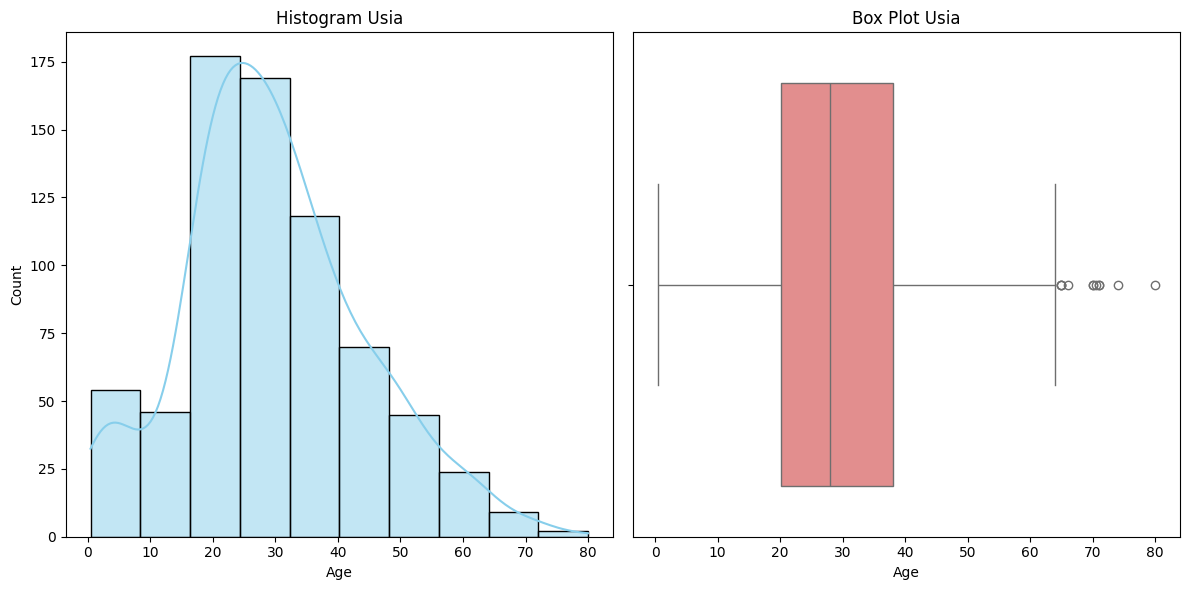

In [197]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(df_train2['Age'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram Usia')

# Box Plot
sns.boxplot(x=df_train2['Age'], ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot Usia')

# Menampilkan visualisasi distribusi
plt.tight_layout()
plt.show()

In [198]:
# Mengisi nilai NaN dengan nilai rata-rata
df_train2['Age Mean'] = df_train2['Age'].fillna(df_train2['Age'].mean())

# Mengisi nilai NaN dengan nilai median
df_train2['Age Median'] = df_train2['Age'].fillna(df_train2['Age'].median())

In [199]:
df_train2.drop(columns=['Age'],axis=1,inplace=True)

In [200]:
df_train2

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age Mean,Age Median
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.000000,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.000000,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.000000,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.000000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,27.000000,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,19.000000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,29.699118,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,26.000000,26.0


## FEATURE ENCODING

1. EMBARKED TARGET ENCODING

In [201]:
from sklearn.preprocessing import LabelEncoder

In [202]:
df_train3 = df_train2.copy()

In [203]:
y = df_train2['Embarked']

label_encoder = LabelEncoder()

# Transformasi variabel target dengan LabelEncoder
df_train3['Embarked'] = label_encoder.fit_transform(y)

2. SEX ONE HOT ENCODE

In [204]:
y = df_train2['Sex']

label_encoder = LabelEncoder()

# Transformasi variabel target dengan LabelEncoder
df_train3['Sex'] = label_encoder.fit_transform(y)

## MULTIVARIATE ANALYSIS

<Axes: >

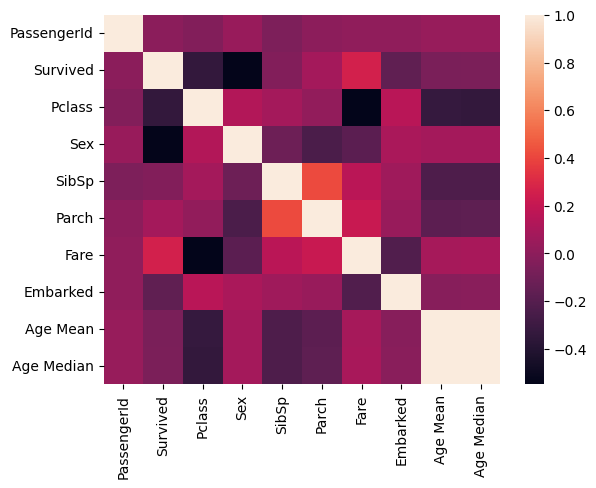

In [205]:
sns.heatmap(df_train3.select_dtypes(exclude='object').corr())

<Axes: >

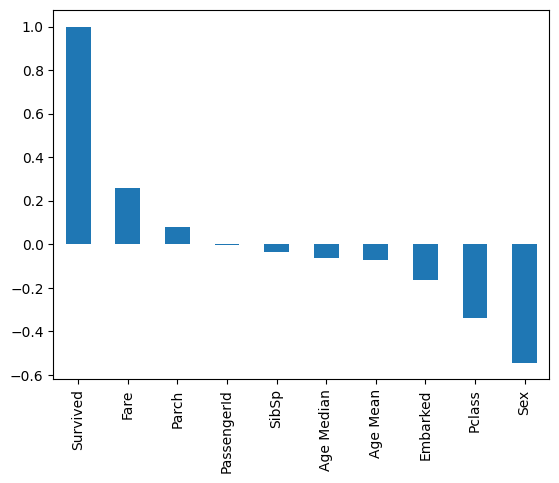

In [206]:
df_train3.select_dtypes(exclude='object').corr()['Survived'].sort_values(ascending=False).plot(kind='bar')

## DATA SPLITTING

In [207]:
from sklearn.model_selection import train_test_split

1. MENGGUNAKAN RATA RATA UMUR

In [208]:
X = df_train3.drop(columns=['Age Median','Survived','Name','Ticket'])
y = df_train3['Survived']

# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan set pengujian
print("Ukuran Set Pelatihan:", X_train.shape, y_train.shape)
print("Ukuran Set Pengujian:", X_test.shape, y_test.shape)
display(X_train)

Ukuran Set Pelatihan: (712, 8) (712,)
Ukuran Set Pengujian: (179, 8) (179,)


,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age Mean
331,332,1,1,0,0,28.5000,2,45.500000
733,734,2,1,0,0,13.0000,2,23.000000
382,383,3,1,0,0,7.9250,2,32.000000
704,705,3,1,1,0,7.8542,2,26.000000
813,814,3,0,4,2,31.2750,2,6.000000
...,...,...,...,...,...,...,...,...
106,107,3,0,0,0,7.6500,2,21.000000
270,271,1,1,0,0,31.0000,2,29.699118
860,861,3,1,2,0,14.1083,2,41.000000
435,436,1,0,1,2,120.0000,2,14.000000


In [209]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [210]:
# Membuat model regresi logistik
model = LogisticRegression(random_state=42)

In [211]:
# Melatih model menggunakan set pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target untuk set pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Menggunakan Median Umur

In [212]:
X = df_train3.drop(columns=['Age Mean','Survived','Name','Ticket'])
y = df_train3['Survived']

# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan set pengujian
print("Ukuran Set Pelatihan:", X_train.shape, y_train.shape)
print("Ukuran Set Pengujian:", X_test.shape, y_test.shape)

Ukuran Set Pelatihan: (712, 8) (712,)
Ukuran Set Pengujian: (179, 8) (179,)


In [213]:
# Melatih model menggunakan set pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target untuk set pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
